# Projet Maths 2022 : q11 à q20

## PRUDHOMME Pierre, SAIDI Medhi, WILK Alexandre

### Question 12

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
def pricer_MC(n, s, r, sigma, T, f):
    normal= np.random.normal(0, 1, n)
    res = 0
    for i in range(n):
        res += np.exp(-r*T) * f(s*np.exp((r - (sigma**2)/2)*T + sigma*np.sqrt(T)*normal[i-1]))
    return res/n

### Question 13

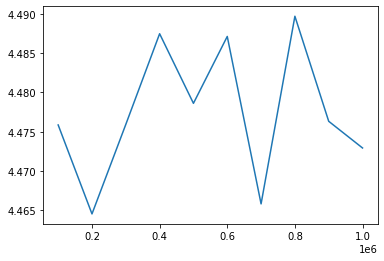

In [4]:
%matplotlib inline
x= [k * 10**5 for k in range(1, 11)]
y = []
for i in range(1, 11):
    y.append(pricer_MC(i*10**5, 100, 0.01, 0.1, 1, lambda x : max(x-100, 0)))

plt.plot(x, y)
plt.show()

### Question 15

In [5]:
from scipy.stats import norm
def put_BS(s, r, sigma, T, K):
    d1 = (1/(sigma*np.sqrt(T)))*(np.log(s/K)+ T*(r+(sigma**2)/2))
    d2 = d1 - sigma*np.sqrt(T)
    return -s*norm.cdf(-d1) + K*np.exp(-r*T)*norm.cdf(-d2)

### Question 16

In [6]:
print(put_BS(100, 0.01, 0.1, 1, 90))

0.5815000751362422


### Question 17

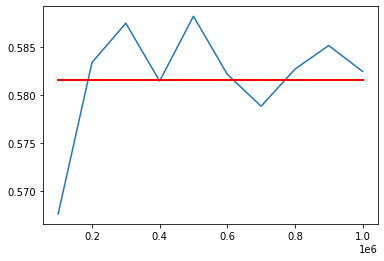

In [7]:
%matplotlib inline
x2= [k * 10**5 for k in range(1, 11)]
y2= []
for i in range(1, 11):
    y2.append(pricer_MC(i*10**5, 100, 0.01, 0.1, 1, lambda x : max(90-x, 0)))
plt.plot(x2, y2)
plt.plot([10**5, 10**6], [put_BS(100, 0.01, 0.1, 1, 90), put_BS(100, 0.01, 0.1, 1, 90)], color='red', linestyle='-', linewidth=2)
plt.show()

On remarque que le modèle de Black-Scholes semble converger vers le prix du put

### Question 18

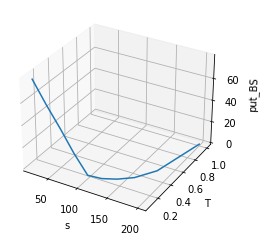

In [8]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
X = [1/12, 1/10, 1/8, 1/7, 1/6, 1/5, 1/4, 1/3, 1/2, 1]
Y = [20*k for k in range(1, 11)]
Z = []
for i in range(1, 11):
    Z.append(put_BS(Y[i-1], 0.01, 0.1, X[i-1], 100))
ax.plot3D(Y, X, Z)
ax.set_xlabel("s")
ax.set_ylabel("T")
ax.set_zlabel("put_BS")
plt.show()


On remarque que le prix initial de l'actif risqué "s" est ce qui influe le plus sur le prix de l'option: avec la formule obtenue par méthode de Montecarlo, plus le prix initial de l'actif risqué est faible, plus le prix de l'option est élevé

### Question 19

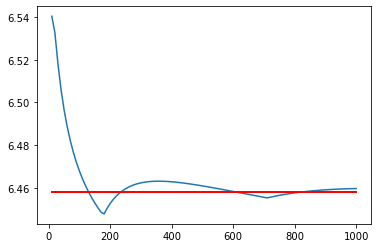

In [9]:
%matplotlib inline
def pricer2(N, rn, hn, bn, s, f):
    memoireprix = [] #On créé une matrice pour se souvenir de tout les prix à chaque noeud à chaque étape (utile pour question 6 cf le pdf)
    q = (rn - bn)/(hn-bn)
    vn = np.zeros(N+1)
    for i in range(N+1):
        vn[i] = f(s*((1+hn)**(N-i))*(1+bn)**i) #On initie les valeurs de f(Stn) à la fin de l'arbre vn[0] est le prix si l'actif n'a que augmenté
    memoireprix.append(vn)                                                                          #vn[n] est le prix si l'actif n'a que diminué
    for k in range(N-1, -1, -1):
        v = np.zeros(k+1) #On construit l'array qui contient le prix de l'option pour tout les noeuds de l'arbre à l'étape K (il y a k+1 prix)
        for j in range(len(v)):
            v[j]= (q*memoireprix[-1][j] + (1-q)*memoireprix[-1][j+1])/(1+rn) #On construit Vk a partir de vk+1, sachant que Vk+1[i] corespond au prix
        memoireprix.append(v)                                                   # si le cours de l'actif risqué augmente, Vk+1[i+1] corespond au prix
    return memoireprix[-1][0] 

s = 100.0
o = 0.2
r = 0.03
T = 1.0
X = [10 * k for k in range(1, 101)]
Y = []
for N in X:
	rN = r * T / N
	hN = (1.0 + rN) * np.exp( o * np.sqrt(T / N)) - 1.0
	bN = (1.0 + rN) * np.exp(-o * np.sqrt(T / N)) - 1.0
	Y.append(pricer2(N, rN, hN, bN, s, lambda x: max(100-x, 0)))

put = put_BS(s, r, o, T, 100)
plt.plot(X, Y)
plt.plot([X[0], X[-1]], [put, put], color='red', linestyle='-', linewidth=2)
plt.show()

De la même manière que dans le modèle de Black-Scholes (Pricer_MC), le modèle de Cox_Rubenstein (pricer2) semble converger vers le put

### Question 20

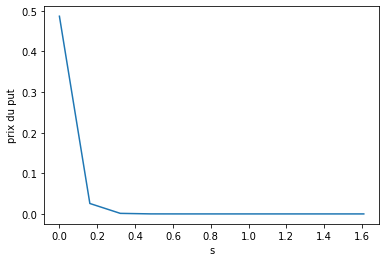

In [11]:
%matplotlib inline
def diff_explicite(T, M, N, K, r, sigma, xmin, xmax):
    p0=np.zeros(N+1)
    h = (xmax-xmin)/N
    deltaT = T/M
    coeff_pjp1 = deltaT*(sigma**2)/(2*h**2) + deltaT*(r-(sigma**2)/2)/(2*h)
    coeff_pj = (1 - ((sigma**2)/h**2) - r)*deltaT
    coeff_pjm1 = (deltaT/(2*h))*(((sigma**2)/h**2) - r + (sigma**2)/2)
    for i in range(0, N+1):
        p0[i] =max(K-math.exp(xmin+i*h), 0)
    all_p= [p0]
    for i in range(1, M+1):
        next_p = np.zeros(N+1)
        next_p[0] = K * math.exp(-r*i*deltaT) - math.exp(xmin)
        next_p[-1] = 0
        for j in range(1, N):
            next_p[j] = coeff_pjp1 * all_p[-1][j+1] + coeff_pj*all_p[-1][j] + coeff_pjm1 * all_p[-1][j-1]
        all_p.append(next_p)
    return all_p[-1]

y = diff_explicite(1, 100, 10, 0.9, 0.015, 0.21, math.log(0.4), math.log(2))
x = [-(math.log(0.4)-math.log(2))* i/10 for i in range(10+1)]
plt.plot(x, y)
plt.xlabel("s")
plt.ylabel("prix du put")
plt.show()

La méthode d'Euler explicite converge pour N=M^2. Pour obtenir le graphique ci-dessus, et afin de minimiser le temps que la fonction prend à s'executer, on a pris M=10.